# Analysis of Full Data Set

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Imports-and-Defaults" data-toc-modified-id="Imports-and-Defaults-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Imports and Defaults</a></span></li></ul></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Pre-Processing" data-toc-modified-id="Pre-Processing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pre-Processing</a></span><ul class="toc-item"><li><span><a href="#Normalising-Species-Names" data-toc-modified-id="Normalising-Species-Names-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Normalising Species Names</a></span></li><li><span><a href="#Clean-Text-(second-pass)" data-toc-modified-id="Clean-Text-(second-pass)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Clean Text (second pass)</a></span></li></ul></li><li><span><a href="#Natural-Language-Processing" data-toc-modified-id="Natural-Language-Processing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Natural Language Processing</a></span><ul class="toc-item"><li><span><a href="#Tokenising,-Normalising-and-Removing-Stopwords" data-toc-modified-id="Tokenising,-Normalising-and-Removing-Stopwords-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Tokenising, Normalising and Removing Stopwords</a></span></li><li><span><a href="#Adding-Sentiment-&amp;-Emotion" data-toc-modified-id="Adding-Sentiment-&amp;-Emotion-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Adding Sentiment &amp; Emotion</a></span></li></ul></li><li><span><a href="#Saving-Dataframe" data-toc-modified-id="Saving-Dataframe-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Saving Dataframe</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Basic-Overview" data-toc-modified-id="Basic-Overview-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Basic Overview</a></span></li><li><span><a href="#Abstract-Length" data-toc-modified-id="Abstract-Length-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Abstract Length</a></span></li><li><span><a href="#N-Grams" data-toc-modified-id="N-Grams-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>N-Grams</a></span><ul class="toc-item"><li><span><a href="#Plotting-N-Grams" data-toc-modified-id="Plotting-N-Grams-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Plotting N-Grams</a></span></li></ul></li><li><span><a href="#Sentiment-of-Most-Common-Words" data-toc-modified-id="Sentiment-of-Most-Common-Words-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Sentiment of Most Common Words</a></span></li><li><span><a href="#Sentiment-Over-Time" data-toc-modified-id="Sentiment-Over-Time-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Sentiment Over Time</a></span></li><li><span><a href="#Sentiment-by-Source" data-toc-modified-id="Sentiment-by-Source-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Sentiment by Source</a></span></li></ul></li><li><span><a href="#Topic-Modelling" data-toc-modified-id="Topic-Modelling-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Topic Modelling</a></span><ul class="toc-item"><li><span><a href="#Functions" data-toc-modified-id="Functions-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Functions</a></span></li></ul></li><li><span><a href="#Saving-Dataframe" data-toc-modified-id="Saving-Dataframe-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Saving Dataframe</a></span><ul class="toc-item"><li><span><a href="#Sentiment-by-Method-and-Mention-of-'Chronic'" data-toc-modified-id="Sentiment-by-Method-and-Mention-of-'Chronic'-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Sentiment by Method and Mention of 'Chronic'</a></span></li></ul></li></ul></div>

### Imports and Defaults

In [1]:
from IPython.core.display import display, HTML, Markdown as md
display(HTML("""<style>.container { width:75% !important; } p, ul {max-width: 40em;} .rendered_html table { margin-left: 0; } .output_subarea.output_png { display: flex; justify-content: center;}</style>"""))

In [2]:
# Dependancies 

#pip install pyplutchik
#pip install text2emotion
#pip install NRCLex
#pip install pyLDAvis
#pip install --upgrade gensim
#pip install spacytextblob

In [3]:
# Basics
import numpy as np 
import pandas as pd 

#String cleaning and processing
import re
import string

# from pprint import pprint

pd.options.mode.chained_assignment = None

In [4]:
# Natural Language Processing

#Natural Language Toolkit
import nltk
from nltk.corpus import stopwords

# TextBlob
from textblob.sentiments import NaiveBayesAnalyzer, PatternAnalyzer
from textblob import Blobber
from textblob import TextBlob, Word

#Flair
from flair.models import TextClassifier
from flair.data import Sentence

#SpaCy
import spacy
import en_core_web_sm
#using small Spacy model
nlp = spacy.load('en_core_web_sm')
nlpmd = spacy.load('en_core_web_md')
from spacy.matcher import Matcher 

#Text2Emotion
import text2emotion as te

#NRCLex - for measuring emotion
from nrclex import NRCLex

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/myfriendscallmej/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/myfriendscallmej/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/myfriendscallmej/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [139]:
# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

# import matplotlib.patches as mpatches
# from matplotlib.lines import Line2D
# import plotly.express as px

%matplotlib inline
rcParams['figure.figsize'] = 15, 10
rcParams['axes.titlesize'] = 20
rcParams['axes.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 18

#Visualising Plutchik Model of Emotions
from pyplutchik import plutchik

#Visualising LDA topics
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

## Load Data

In [6]:
LymeDisease = pd.read_csv('abstracts.csv', index_col=0)

In [7]:
LymeDisease.head()

,publication,title,authors,doi,year,cites,type,abstract,abstractLength,pubmed,gscholar,crossref,scopus,publicationLanguage,titleLanguage,abstractLanguage,source,doiJournal
0,journal of psychiatric practice,Panic attacks may reveal previously unsuspecte...,['V T Sherr'],10.1097/00131746-200011000-00005,2000.0,0,Journal Article,The author describes the histories of three pa...,1544.0,1,0,0,0,en,en,en,collated,10.1097
1,journal of medical entomology,Efficiency of drag sampling for estimating pop...,"[{'name': 'L Tälleklint-Eisen', 'affiliation':...",10.1093/jmedent/37.3.484,2000.0,0,Journal Article,Drag sampling is a commonly used method to obt...,1533.0,1,0,0,0,en,en,en,collated,10.1093
2,journal of medical entomology,Populations of Ixodes scapularis (Acari: Ixodi...,"[{'name': 'C J Jones', 'affiliation': 'Departm...",10.1603/0022-2585(2000)037[0408:poisai]2.0.co;2,2000.0,0,Journal Article,"From 1990 through 1997, Ixodes scapularis Say ...",1069.0,1,0,0,0,en,en,en,collated,10.1603
3,journal of medical entomology,Methodology for sampling questing nymphs of Ix...,"[{'name': 'M Vassallo', 'affiliation': ""Unité ...",10.1093/jmedent/37.3.335,2000.0,0,Journal Article,To assess the Lyme borreliosis vector populati...,1757.0,1,0,0,0,en,en,en,collated,10.1093
4,journal of medical entomology,Attempt to control ticks (Acari: Ixodidae) on ...,"[{'name': 'P W Rand', 'affiliation': 'Lyme Dis...",10.1603/0022-2585-37.1.126,2000.0,0,Journal Article,We report an attempt by an offshore island com...,1720.0,1,0,0,0,en,en,en,collated,10.1603


In [8]:
LymeDisease.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5641 entries, 0 to 5640
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   publication          5641 non-null   object 
 1   title                5641 non-null   object 
 2   authors              5632 non-null   object 
 3   doi                  5641 non-null   object 
 4   year                 5641 non-null   float64
 5   cites                5641 non-null   int64  
 6   type                 5641 non-null   object 
 7   abstract             5641 non-null   object 
 8   abstractLength       5641 non-null   float64
 9   pubmed               5641 non-null   int64  
 10  gscholar             5641 non-null   int64  
 11  crossref             5641 non-null   int64  
 12  scopus               5641 non-null   int64  
 13  publicationLanguage  5641 non-null   object 
 14  titleLanguage        5641 non-null   object 
 15  abstractLanguage     5641 non-null   o

In [9]:
text = LymeDisease.loc[1]['abstract']
print(text)

Drag sampling is a commonly used method to obtain relative estimates of the density of questing nymphal Ixodes scapularis Say and I pacificus Cooley & Kohls ticks, which are primary vectors of Lyme disease spirochetes to humans in North America. However, the efficiency of drag sampling in determining absolute population densities of questing nymphs has not been evaluated previously. Therefore, we assessed the efficiency of a single drag-sampling occasion to estimate the total population size of questing I pacificus nymphs in a leaf-litter habitat in California. Repeated daily removal sampling was carried out in four areas, each covering 300 m2, on 17 occasions over a 23-d period in the spring of 1999. In total, 573 I. pacificus nymphs were collected, of which 55 (9.6%) were collected on the initial sampling occasion and 20 (3.5%) on the last occasion. The total population size of questing nymphs, i.e., the intersection with the horizontal axis of a linear regression of daily nymphal ca

## Pre-Processing

### Normalising Species Names

<p>Species names can appear in an inconsistent formats. <i>Genus species</i>, <i>G. species</i>, <i>G. species sub species</i>, <i>G. species s. s</i>. etc so normalising them may give a better picture of common words and n-grams. </p>
<p>The function below finds the abbreviated forms of species names (normally a second mention) and then matches with a preceeding full name earlier in the text and then converts both the abbreviated and full mention to camel case <i>GenusSpecies</i> or the expanded <i>Genus species</i>. It so far does not catch all of them but has picked up over 470 variations and can be further refined. A new version was added to add expanded versions instead of camel case but this is not implemented in this partocular notebook</p>
<p>Overall, the process has a few steps:</p>
<ol>
    <li>item</li>
</ol>

In [10]:
def clean_text(text):
    text = re.sub('-', ' ', text) #replace hyphen with space
    text = re.sub(' +', ' ', text) #remove extra whitespace
        
    #normalise species suffixes to help with tokenisation
    text = re.sub('spp.', 'spp', text)
    text = re.sub('sp.', 'sp', text)
    text = re.sub('cf.', 'cf', text)
    text = re.sub('aff.', 'aff', text)
    text = re.sub('var.', 'var', text)
    
    text = re.sub('spcific|spcific', 'specific', text)
    text = re.sub('Borellia |spcific', 'Borrelia ', text)
    text = re.sub('Anapalsma', 'Anaplasma')

    Borellia
    text = re.sub(r's\.l\.|s\. l\.', 'sensu latu', text)
    text = re.sub(r's\.s\.|s\. s\.', 'sensu stricto', text)
    
    return text

In [11]:
def normaliseSpeciesNames(text):

    speciesShortName =''
    speciesShortNamesList = []
    speciesShortNameTokens = []
    speciesShortNameTokensList = []
    speciesFullNameList = []
    camelCaseList = []
    replaceDict = {}
    replaceDictSpace = {}
    
    doc = nlp(text) #tokenise with SpaCy
    
    for token in doc[:-1]:
        if token.shape_ == 'X.':
            speciesShortName = speciesShortName + str(token)
            speciesShortNameTokens.append(token)
            j=1        
            while (#doc[token.i+j].shape_ == 'x.' or 
                   doc[token.i+j].text in ['spp', 'sp', 'cf', 'aff', 'var', 'sensu', 'latu', 'stricto'] or
                   (doc[token.i+j].shape_ == 'xxxx' and
                    doc[token.i+j].is_alpha and 
                    doc[token.i+j].is_stop==False and #not a stopword
                    doc[token.i+j].is_oov and #not in SpaCy vocab
                    doc[token.i+j].lemma_ == doc[token.i+j].text and #is already in lemmatised form
                    doc[token.i+j].text not in nltk.corpus.words.words()) and #not in NLTK vocab
                    doc[token.i+j].text.lower() != 'osp'):
                speciesShortName += ' ' + str(doc[token.i+j])
                speciesShortNameTokens.append(doc[token.i+j])
                j+=1
                if token.i+j >= len(doc): 
                    break
                
            if (len(speciesShortNameTokens)>1 and speciesShortName not in speciesShortNamesList):
                speciesShortNamesList.append(speciesShortName)
                speciesShortNameTokensList.append(speciesShortNameTokens)
                
                matcher = Matcher(nlp.vocab)
                letter = "^" + speciesShortNameTokens[0].text[0]
                pattern = [{"SHAPE": "Xxxxx", "TEXT": {"REGEX": letter}}] #find capitalised word beginning with correct letter
                for tkn in speciesShortNameTokens[1:]:
                    if tkn.shape_ =='x.':
                        letter = "^" + tkn.text[0]
                        pattern.append({"SHAPE": "xxxx", "TEXT": {"REGEX": letter}}) #find non-capitalised word beginning with correct letter
                    else:
                        pattern.append({"TEXT": tkn.text})
                matcher.add("Species_Pattern", [pattern])
#                 print(pattern)
                matches = matcher(doc)
                if len(matches)>0:
#                     print ('loop 1', matches)
                    start = matches[0][1]
                    end =  matches[0][2]
                    matched_span = doc[start:end]
                    speciesFullNameList.append(matched_span.text)
                else: 
                    matcher = Matcher(nlp.vocab)
                    letter = "^" + speciesShortNameTokens[0].text[0]
                    pattern = [{"SHAPE": "Xxxxx", "TEXT": {"REGEX": letter}}] #find capitalised word beginning with correct letter
                    matcher.add("Species_Pattern", [pattern])
                    matches = matcher(doc)
#                     print ('loop 2', matches, type(matches))
                    while len(matches)>0:
#                         print(len(matches))
                        start = matches[0][1]
                        end =  matches[0][2]
                        matched_span = doc[start:end]
                        if ((doc[start].lemma_ in nltk.corpus.words.words() or nlpmd(doc[start].text)[0].is_oov == False) and 
                            doc[start].lemma_ not in ['Borrelia', 'Ixodes', 'Anaplasma', 'Amblyomma', 'Haemaphysalis'] or
                            doc[start].text in ['Bavara','Biobank','Biocan','Bioveta', 'Blacklegged', 'Borrelial', 'Borreliosis', 
                                                'Borreliacidal', 'Borreliae', 'Brønnøysund', 'Rickettsiales', 'Rickettsiaceae']):
                            del(matches[0])
#                             print('deleted', len(matches))
                            continue
                        else:
                            name = matched_span.text +' '+ ' '.join(tkn.text for tkn in speciesShortNameTokens[1:])
                            speciesFullNameList.append(name)
#                             print('here')
                            break
            speciesShortName=''
            speciesShortNameTokens=[]

    for name in speciesFullNameList:
        camel = ''.join(word.capitalize() for word in name.split(' '))
        camelCaseList.append(camel)

    for short, long, camel in zip(speciesShortNamesList, speciesFullNameList, camelCaseList):
        replaceDict[short] = camel
        replaceDict[long] = camel
        namesDict[long] = camel
        replaceDictSpace[short] = long
        
    #sort dictionary of words to replace by length so longest names are changed first
    sortedKeyList = sorted(replaceDict.keys(), key=lambda s: len(replaceDict.get(s)), reverse = True)
    
    camelSpecies = text
    spacedSpecies = text
    for index in range(len(sortedKeyList)):
        camelSpecies = re.sub(sortedKeyList[index], replaceDict[sortedKeyList[index]], camelSpecies)
        
#     for key in replaceDictSpace.keys():
#         spacedSpecies = re.sub(key, replaceDictSpace[key],spacedSpecies)  
#     return {'camelCasedSpecies': camelSpecies, 'expandedSpecies': spacedSpecies}
    return camelSpecies

In [17]:
LymeDisease['clean_text'] = LymeDisease['abstract'].apply(clean_text)

In [18]:
#global variable to collect names 
namesDict = {}

In [19]:
# speciesDF = LymeDisease.apply(lambda row: normaliseSpeciesNames(row.clean_text), axis='columns', result_type='expand')
# LymeDisease = pd.concat([LymeDisease, speciesDF], axis='columns')
# del speciesDF

In [20]:
LymeDisease['camelCasedSpecies']= LymeDisease.clean_text.apply(normaliseSpeciesNames)

In [22]:
len(namesDict)

431

In [23]:
namesDict

{'Ixodes pacificus': 'IxodesPacificus',
 'Borrelia garinii': 'BorreliaGarinii',
 'Borrelia afzelii': 'BorreliaAfzelii',
 'Borrelia burgdorferi': 'BorreliaBurgdorferi',
 'Ixodes scapularis': 'IxodesScapularis',
 'Itapevi loricatus': 'ItapeviLoricatus',
 'Borrelia burgdorferi sensu stricto': 'BorreliaBurgdorferiSensuStricto',
 'Babesia microti': 'BabesiaMicroti',
 'Ixodes persulcatus': 'IxodesPersulcatus',
 'Borrelia valaisiana': 'BorreliaValaisiana',
 'Borrelia lusitaniae': 'BorreliaLusitaniae',
 'Borrelia burgdorferi sensu lato': 'BorreliaBurgdorferiSensuLato',
 'Borrelia burgdorferi plasmid': 'BorreliaBurgdorferiPlasmid',
 'Borrelia recurrentis': 'BorreliaRecurrentis',
 'Ixodes muris': 'IxodesMuris',
 'Borrelia burgdorferi flagellin': 'BorreliaBurgdorferiFlagellin',
 'Borrelia burgdoreferi': 'BorreliaBurgdoreferi',
 'Biogastranema leporis': 'BiogastranemaLeporis',
 'Rauschia triangularis': 'RauschiaTriangularis',
 'Trichuris sylvilagi': 'TrichurisSylvilagi',
 'Ixodes spnipalpis': 'Ixo

In [52]:
namesDictSorted = dict(sorted(namesDict.items()))
# namesDictSorted

In [25]:
from nltk.tokenize import RegexpTokenizer

#w means tokens are made of only alphanumeric characters where + indicates that they comprise of one or more of such characters
tokenizer = RegexpTokenizer(r'\w+')

In [45]:
OverNormalised = {}
for key, value in namesDictSorted.items():
    tokens = tokenizer.tokenize(key)
    changed = False
    if len(tokens)>2:
        i=1
        backtrack=0
        while (tokens[-i] not in ['sensu', 'lato','latu', 'stricto', 'strictu','sp', 'barberi', 'kaiseri', 'neuquenensis'] and len(tokens)-i>=2):
            backtrack = backtrack - len(tokens[-i])
            newkey = namesDictSorted[key]
            newvalue = value[:backtrack]+ ' ' + ' '.join(tkn for tkn in tokens[-i:])
            i+=1
            changed = True
        if (changed):
            OverNormalised[newkey] = newvalue
            
OverNormalised['Borellia|Borreila'] = 'Borrelia' #Mispelled
OverNormalised['Anapalsma'] = 'Anaplasma' #Mispelled

#Assigned the incorrect Genus name during the normalisation process
OverNormalised['AmblyommaPhagocytophilum'] = 'AnaplasmaPhagocytophilum'
OverNormalised['BorreliaCaballi'] = 'BabesiaCaballi'
OverNormalised['BorreliaClarridgeiae'] = 'BartonellaClarridgeiae'
OverNormalised['BorreliaGibsoni'] = 'BabesiaGibsoni'
OverNormalised['BorreliaHenselae'] = 'BartonellaHenselae'
OverNormalised['BorreliaMicroti'] = 'BabesiaMicroti'
OverNormalised['BorreliaOdocoilei'] = 'BabesiaOdocoilei'
OverNormalised['BorreliaVenatorum'] = 'BabesiaVenatorum'
OverNormalised['BorreliaVogeli'] = 'BabesiaVogeli'
OverNormalised['BorrelialAfzelii'] = 'BorreliaAfzelii'
OverNormalised['BorrelialGarinii'] = 'BorreliaGarinii'
OverNormalised['IxodidaScapularis'] = 'IxodesScapularis'
OverNormalised['PowassanManiculatus'] = 'PeromyscusManiculatus'
OverNormalised['RhipicephalusAeschlimannii'] = 'RickettsiaAeschlimannii'
OverNormalised['RhipicephalusHelvetica'] = 'RickettsiaHelvetica'
OverNormalised['RhipicephalusHelvetica'] = 'RickettsiaHelvetica'
OverNormalised['RhipicephalusMonacensis'] = 'RickettsiaMonacensis'
OverNormalised['RhipicephalusMonacensis'] = 'RickettsiaMonacensis'
OverNormalised['RickettsialesRhipicephali'] = 'RickettsiaRhipicephali'
OverNormalised['RickettsialesRhipicephalus'] = 'RickettsiaRhipicephalus' 

In [55]:
#deleting the incorrect names from the main dictionary before creating the dictionary of matched names
del namesDictSorted['Amblyomma phagocytophilum']
del namesDictSorted['Anaplasma bovis']
del namesDictSorted['Anaplasma phagocytophilum']
del namesDictSorted['Borrelia miyamotoi']
del namesDictSorted['Borellia burgdorferi']
del namesDictSorted['Borreila burgdorferi']
del namesDictSorted['Borrelia caballi']
del namesDictSorted['Borrelia clarridgeiae']
del namesDictSorted['Borrelia gibsoni']
del namesDictSorted['Borrelia henselae']
del namesDictSorted['Borrelia microti']
del namesDictSorted['Borrelia odocoilei']
del namesDictSorted['Borrelia venatorum']
del namesDictSorted['Borrelia vogeli']
del namesDictSorted['Borrelial afzelii']
del namesDictSorted['Borrelial garinii']
del namesDictSorted['Ixodida scapularis']
del namesDictSorted['Powassan maniculatus']
del namesDictSorted['Rhipicephalus aeschlimannii']
del namesDictSorted['Rhipicephalus helvetica']
del namesDictSorted['Rhipicephalus monacensis']
del namesDictSorted['Rhipicephalus rhipicephali']
del namesDictSorted['Rhipicephalus rhipicephalus']
del namesDictSorted['Rickettsiales helvetica']
del namesDictSorted['Rickettsiales monacensis']

In [56]:
NormalisedPairs = {}
for key, value in namesDictSorted.items():
    tokens = tokenizer.tokenize(key)
    if len(tokens)==2:
        newkey = key
        newvalue = value
        NormalisedPairs[newkey] = newvalue
        if tokens[0]!= 'Borreliella':
            newkey = tokens[0][0]+'. '+tokens[1]
            newvalue = value
            if newkey in NormalisedPairs.keys():
                print(newkey, key, 'already exists', NormalisedPairs[newkey])
            NormalisedPairs[newkey] = newvalue


In [57]:
OverNormalised

{'AnaplasmaPhagocytophilumCoinfection': 'AnaplasmaPhagocytophilum coinfection',
 'AnaplasmaPhagocytophilumSeroprevalence': 'AnaplasmaPhagocytophilum seroprevalence',
 'AnaplasmaPhagocytophilumVarant': 'AnaplasmaPhagocytophilum varant',
 'BorreliaAfzeliiLifecycle': 'BorreliaAfzelii lifecycle',
 'BorreliaAfzeliiRespctively': 'BorreliaAfzelii respctively',
 'BorreliaAfzeliiUpregulated': 'BorreliaAfzelii upregulated',
 'BorreliaBurgdoRferi': 'BorreliaBurgdo rferi',
 'BorreliaBurgdorferiAdhesin': 'BorreliaBurgdorferi adhesin',
 'BorreliaBurgdorferiBiofilm': 'BorreliaBurgdorferi biofilm',
 'BorreliaBurgdorferiChitinase': 'BorreliaBurgdorferi chitinase',
 'BorreliaBurgdorferiCoinfection': 'BorreliaBurgdorferi coinfection',
 'BorreliaBurgdorferiCorrespnd': 'BorreliaBurgdorferi correspnd',
 'BorreliaBurgdorferiDespte': 'BorreliaBurgdorferi despte',
 'BorreliaBurgdorferiElicited': 'BorreliaBurgdorferi elicited',
 'BorreliaBurgdorferiEnolase': 'BorreliaBurgdorferi enolase',
 'BorreliaBurgdorferiF

In [72]:
dict(sorted(NormalisedPairs.items()))

{'A. agrarius': 'ApodemusAgrarius',
 'A. americanum': 'AmblyommaAmericanum',
 'A. bovis': 'AnapalsmaBovis',
 'A. breviscutatum': 'AmblyommaBreviscutatum',
 'A. cordiferum': 'AmblyommaCordiferum',
 'A. fahrenholzi': 'AndrolaelapsFahrenholzi',
 'A. flavicollis': 'ApodemusFlavicollis',
 'A. geayi': 'AmblyommaGeayi',
 'A. helvolum': 'AmblyommaHelvolum',
 'A. javanense': 'AmblyommaJavanense',
 'A. maculatum': 'AmblyommaMaculatum',
 'A. marginale': 'AnaplasmaMarginale',
 'A. ovis': 'AnaplasmaOvis',
 'A. palustris': 'AnaplasmaPalustris',
 'A. persicus': 'ArgasPersicus',
 'A. phagoctyophilum': 'AnaplasmaPhagoctyophilum',
 'A. phagocytophila': 'AnaplasmaPhagocytophila',
 'A. phagocytophilium': 'AnaplasmaPhagocytophilium',
 'A. phagocytophillum': 'AnaplasmaPhagocytophillum',
 'A. phagocytophilum': 'AnapalsmaPhagocytophilum',
 'A. phagocytophium': 'AnaplasmaPhagocytophium',
 'A. platys': 'AnaplasmaPlatys',
 'A. sylvaticus': 'ApodemusSylvaticus',
 'A. testudinarium': 'AmblyommaTestudinarium',
 'A.

In [62]:
def Denormalise(text):
    for key in OverNormalised:
        text = re.sub(key, OverNormalised[key], text)
    return text

In [75]:
def NormaliseMissedPairs(text):
    for key in NormalisedPairs:
        text = re.sub(key, NormalisedPairs[key], text)
    return text

In [113]:
def clean_text2(text):
    text = re.sub(r"[^0-9A-Za-z ]", ' ' , text) #remove double quotation and any punctuation
    text = re.sub(r' \d ', ' ', text) #remove numbers in isolation but not ones that are part of words e.g. protein names like bbe46
    text = re.sub(r' \d+ ', ' ', text)
    text = re.sub('BorreliaBurgdorferi s l|BorreliaBurgdorferi sl|Borreliaburgdorferi sensu lato|BorreliaBurgdorferi sensu lato',
                  'BorreliaBurgdorferiSensuLato', text, flags=re.IGNORECASE)
    text = re.sub('BorreliaBurgdorferi s s|BorreliaBurgdorferi ss|Borreliaburgdorferi sensu stricto|BorreliaBurgdorferi sensu stricto', 
                  'BorreliaBurgdorferiSensuStricto', text, flags=re.IGNORECASE)
    text = re.sub('spcies', 'species', text)
    text = re.sub('LD', 'Lyme disease', text)
    text = re.sub('LB', 'Lyme borreliosis', text)
    text = re.sub('LNB', 'Lyme neuroborreliosis', text)
    text = re.sub(' +', ' ', text) #remove extra whitespace  
    return text

In [114]:
def removeRepeats(text):
    text = re.sub('Lyme borreliosis Lyme borreliosis', 'Lyme borreliosis', text)
    text = re.sub('Lyme neuroborreliosis Lyme neuroborreliosis', 'Lyme neuroborreliosis', text)
    text = re.sub('Lyme disease Lyme disease', 'Lyme disease', text)
    text = re.sub('BorreliaBurgdorferi sensu lato','BorreliaBurgdorferiSensuLato', text, flags=re.IGNORECASE)
    text = re.sub('BorreliaBurgdorferi sensu stricto','BorreliaBurgdorferiSensuStricto', text, flags=re.IGNORECASE)
    return text

In [115]:
LymeDisease['preprocessedAbstract'] = LymeDisease.camelCasedSpecies.apply(Denormalise)
LymeDisease['preprocessedAbstract'] = LymeDisease.preprocessedAbstract.apply(NormaliseMissedPairs)
LymeDisease['preprocessedAbstract'] = LymeDisease.preprocessedAbstract.apply(clean_text2)
LymeDisease['preprocessedAbstract'] = LymeDisease.preprocessedAbstract.apply(removeRepeats)

### Clean Text (second pass)

<p>A second round of cleaning can now help normalise more of the common Genus names that were sometimes omitted and therefore not matched by the process carried out above. Then we remove punctuation and any digits that aren't part of words.</p>

## Natural Language Processing

### Tokenising, Normalising and Removing Stopwords

In [122]:
from nltk.tokenize import RegexpTokenizer

#w means tokens are made of only alphanumeric characters where + indicates that they comprise of one or more of such characters
tokenizer = RegexpTokenizer(r'\w+')

lemmatizer = nltk.WordNetLemmatizer()

In [123]:
from nltk.corpus import stopwords
stoplist = set(stopwords.words("english"))

In [124]:
def prepareTextforAnalysis(text):
    tokenised_doc = tokenizer.tokenize(text)
    text = " ".join([lemmatizer.lemmatize(token) for token in tokenised_doc if token.lower() not in stoplist])
    return text

In [125]:
LymeDisease['processedAbstract'] = LymeDisease.preprocessedAbstract.apply(prepareTextforAnalysis)

### Adding Sentiment & Emotion

In [126]:
flairClassifier = TextClassifier.load('en-sentiment')

2021-11-14 18:30:42,526 loading file /Users/myfriendscallmej/.flair/models/sentiment-en-mix-distillbert_4.pt


In [128]:
def flair_prediction(x):
    sentence = Sentence(x)
    flairClassifier.predict(sentence)
    score = sentence.labels[0]
    if "POSITIVE" in str(score):
        return "pos", sentence.labels[0].score
    elif "NEGATIVE" in str(score):
        return "neg", sentence.labels[0].score*-1
    else:
        return "neu", sentence.labels[0].score

In [129]:
flairSentimentDF = LymeDisease.apply(lambda row: flair_prediction(row.processedAbstract), axis='columns', result_type='expand')
flairSentimentDF.rename(columns={0:'abstractSentiment', 1:'abstractSentConfidence'}, inplace=True)
LymeDisease = pd.concat([LymeDisease, flairSentimentDF], axis='columns')
del flairSentimentDF

In [130]:
def measurePlutchikEmotions(text):
    text_object = NRCLex(text)
    emotions = text_object.affect_frequencies
    emotions.pop('positive')
    emotions.pop('negative')
    emotions['anticipation']=emotions.pop('anticip')
    return emotions

In [131]:
emotionsDF = LymeDisease.apply(lambda row: measurePlutchikEmotions(row.processedAbstract), axis='columns', result_type='expand')
LymeDisease = pd.concat([LymeDisease, emotionsDF], axis='columns')
del emotionsDF

## Saving Dataframe

In [132]:
LymeDisease.to_csv('LymeDiseaseFullWithSentiment.csv')

## EDA

### Basic Overview

In [133]:
LymeDisease.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5641 entries, 0 to 5640
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   publication             5641 non-null   object 
 1   title                   5641 non-null   object 
 2   authors                 5632 non-null   object 
 3   doi                     5641 non-null   object 
 4   year                    5641 non-null   float64
 5   cites                   5641 non-null   int64  
 6   type                    5641 non-null   object 
 7   abstract                5641 non-null   object 
 8   abstractLength          5641 non-null   float64
 9   pubmed                  5641 non-null   int64  
 10  gscholar                5641 non-null   int64  
 11  crossref                5641 non-null   int64  
 12  scopus                  5641 non-null   int64  
 13  publicationLanguage     5641 non-null   object 
 14  titleLanguage           5641 non-null   

In [134]:
LymeDisease.describe()

,year,cites,abstractLength,pubmed,gscholar,crossref,scopus,doiJournal,abstractSentConfidence,fear,anger,trust,surprise,sadness,disgust,joy,anticipation
count,5641.000000,5641.000000,5641.000000,5641.000000,5641.000000,5641.000000,5641.000000,5641.000000,5641.000000,5641.000000,5641.000000,5641.000000,5641.000000,5641.000000,5641.000000,5641.000000,5641.0
mean,2012.098919,5.353129,1400.183124,0.756249,0.010814,0.166283,0.066655,10.153185,-0.014652,0.134871,0.058499,0.100443,0.020956,0.085482,0.064699,0.031501,0.0
std,6.365699,22.409410,534.400840,0.429382,0.103434,0.372367,0.249445,0.109087,0.897138,0.056260,0.037609,0.060193,0.026273,0.045629,0.041151,0.032617,0.0
min,2000.000000,0.000000,131.000000,0.000000,0.000000,0.000000,0.000000,10.100100,-0.999985,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,2007.000000,0.000000,1041.000000,1.000000,0.000000,0.000000,0.000000,10.101600,-0.962598,0.096774,0.031250,0.058824,0.000000,0.052632,0.036364,0.000000,0.0
50%,2013.000000,0.000000,1410.000000,1.000000,0.000000,0.000000,0.000000,10.111100,-0.514301,0.135135,0.056604,0.092593,0.014493,0.084746,0.062500,0.025000,0.0
75%,2017.000000,0.000000,1720.000000,1.000000,0.000000,0.000000,0.000000,10.129200,0.946169,0.171875,0.083333,0.131579,0.032609,0.115385,0.090909,0.047619,0.0
max,2021.000000,465.000000,7135.000000,1.000000,1.000000,1.000000,1.000000,10.977800,0.999911,0.428571,0.241379,1.000000,0.250000,0.320000,0.555556,0.333333,0.0


### Abstract Length

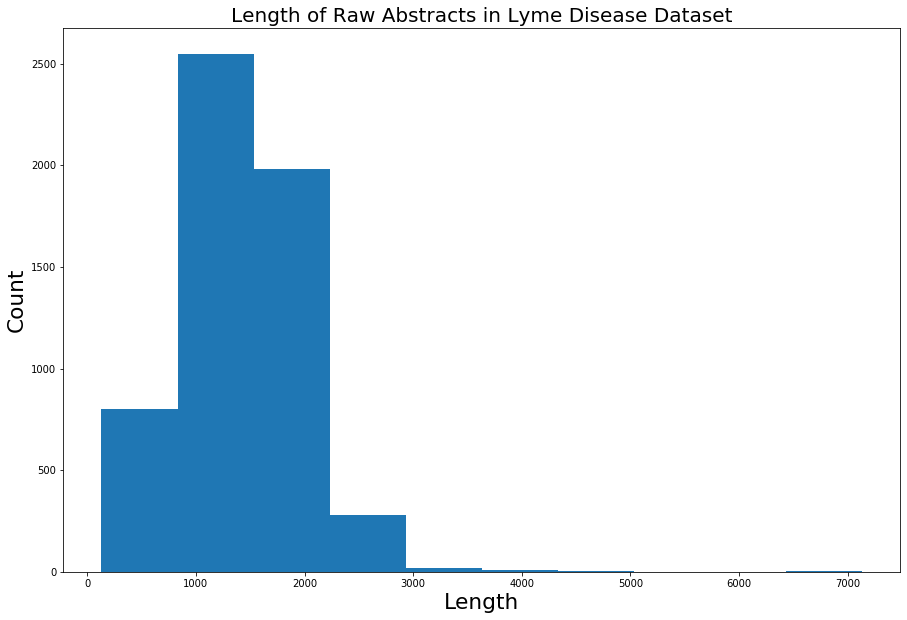

In [143]:
LymeDisease.abstractLength.hist()
plt.xlabel('Abstract Length')
plt.xlabel('Length')
plt.ylabel('Count')
plt.title('Length of Raw Abstracts in Lyme Disease Dataset')
plt.grid(False);

### N-Grams

In [136]:
from nltk import bigrams
from nltk import trigrams
from nltk.util import ngrams
from collections import Counter
# from nltk.collocations import *

In [137]:
def documentNgrams(documents, ngramsize, numReturned):
    ngrams_all = []
    for document in documents:
        tokens = document.split()
        if len(tokens) <= ngramsize:
            continue
        else:
            output = list(ngrams(tokens, ngramsize))
        for ngram in output:
            ngrams_all.append(" ".join(ngram))
    cnt_ngram = Counter()
    for word in ngrams_all:
        cnt_ngram[word] += 1
    df = pd.DataFrame.from_dict(cnt_ngram, orient='index').reset_index()
    df = df.rename(columns={'index':'words', 0:'count'})
    df = df.sort_values(by='count', ascending=False)
    df = df.reset_index(drop=True)
    df = df.head(numReturned)
    #df = df.sort_values(by='count')
    return(df)

In [146]:
mostCommonWords = documentNgrams(LymeDisease.processedAbstract, 1, 20)
mostCommonBigrams = documentNgrams(LymeDisease.processedAbstract, 2, 20)
mostCommonTrigrams = documentNgrams(LymeDisease.processedAbstract, 3, 20)
mostCommon4grams = documentNgrams(LymeDisease.processedAbstract, 4, 20)
mostCommon5grams = documentNgrams(LymeDisease.processedAbstract, 5, 20)

In [153]:
mostCommonTrigrams

,words,count
0,tick borne disease,621
1,agent Lyme disease,476
2,tick borne pathogen,352
3,causative agent Lyme,315
4,outer surface protein,300
5,vector borne disease,288
6,Lyme disease sprochete,269
7,polymerase chain reaction,259
8,Lyme disease patient,242
9,treatment Lyme disease,199


#### Plotting N-Grams

''

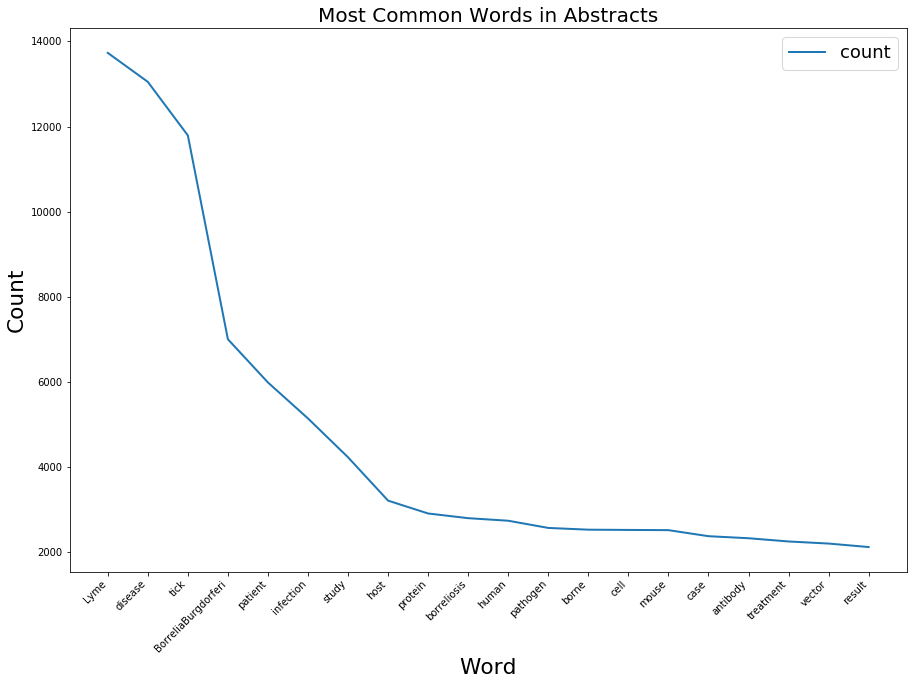

In [147]:
mostCommonWords.plot(x='words', y='count')
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Most Common Words in Abstracts')
plt.xticks(mostCommonWords.index, list(mostCommonWords.words), rotation=45, ha='right');

''

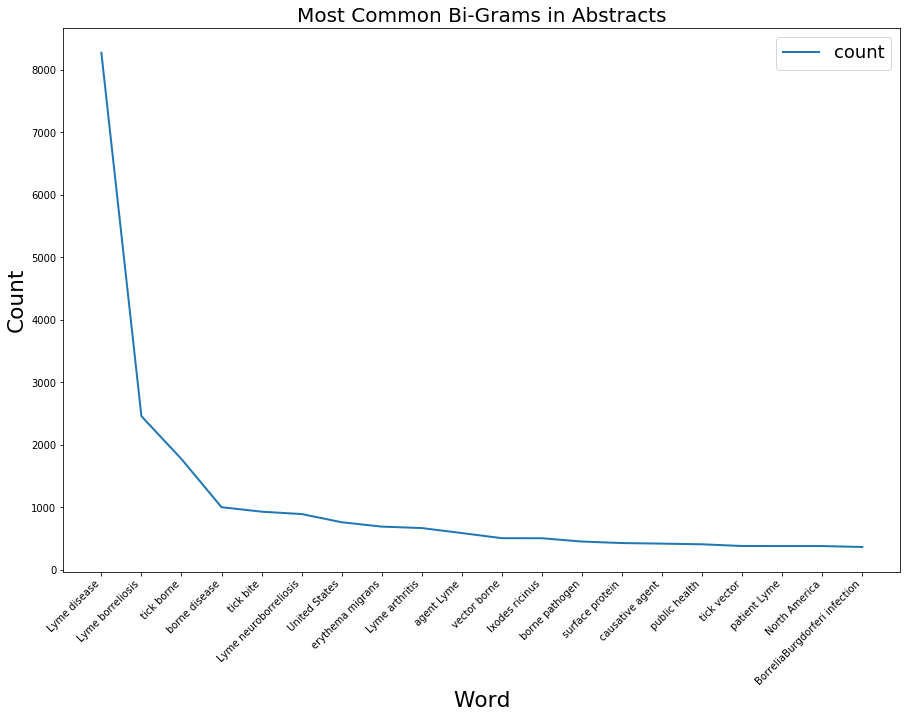

In [154]:
mostCommonBigrams.plot(x='words', y='count')
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Most Common Bi-Grams in Abstracts')
plt.xticks(mostCommonBigrams.index, list(mostCommonBigrams.words), rotation=45, ha='right')
;

''

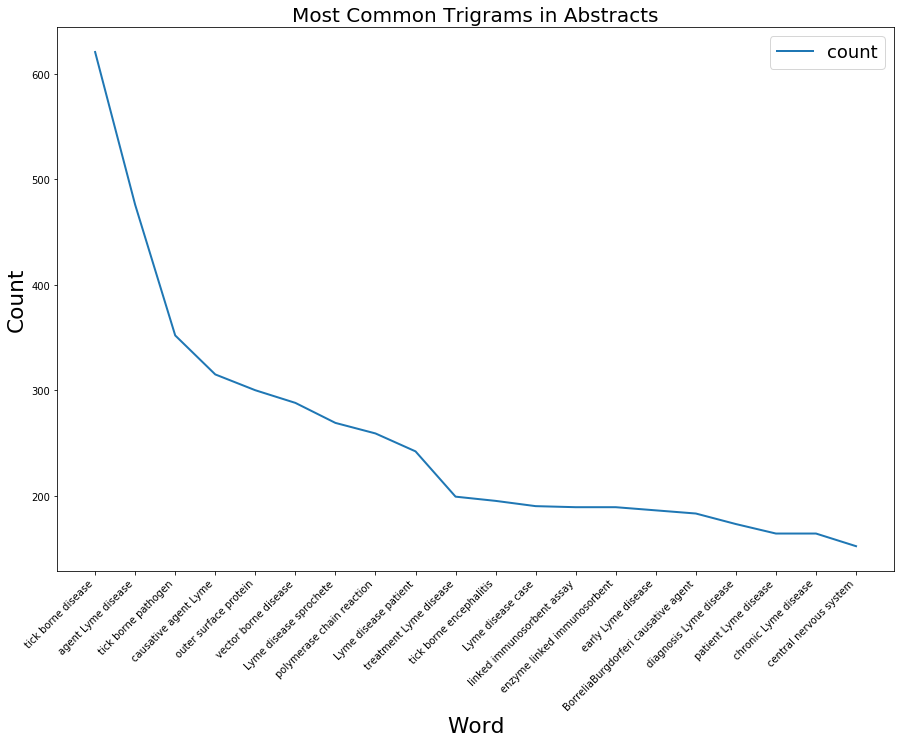

In [155]:
mostCommonTrigrams.plot(x='words', y='count')
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Most Common Trigrams in Abstracts')
plt.xticks(mostCommonTrigrams.index, list(mostCommonTrigrams.words), rotation=45, ha='right')
;

''

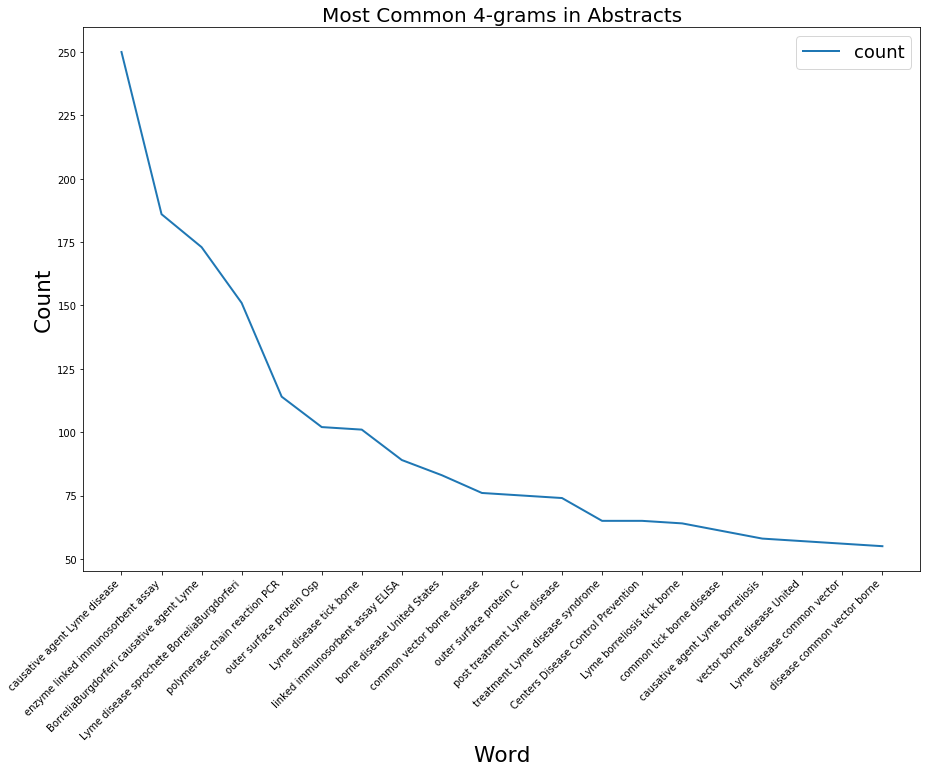

In [156]:
mostCommon4grams.plot(x='words', y='count')
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Most Common 4-grams in Abstracts')
plt.xticks(mostCommon4grams.index, list(mostCommon4grams.words), rotation=45, ha='right')
;

''

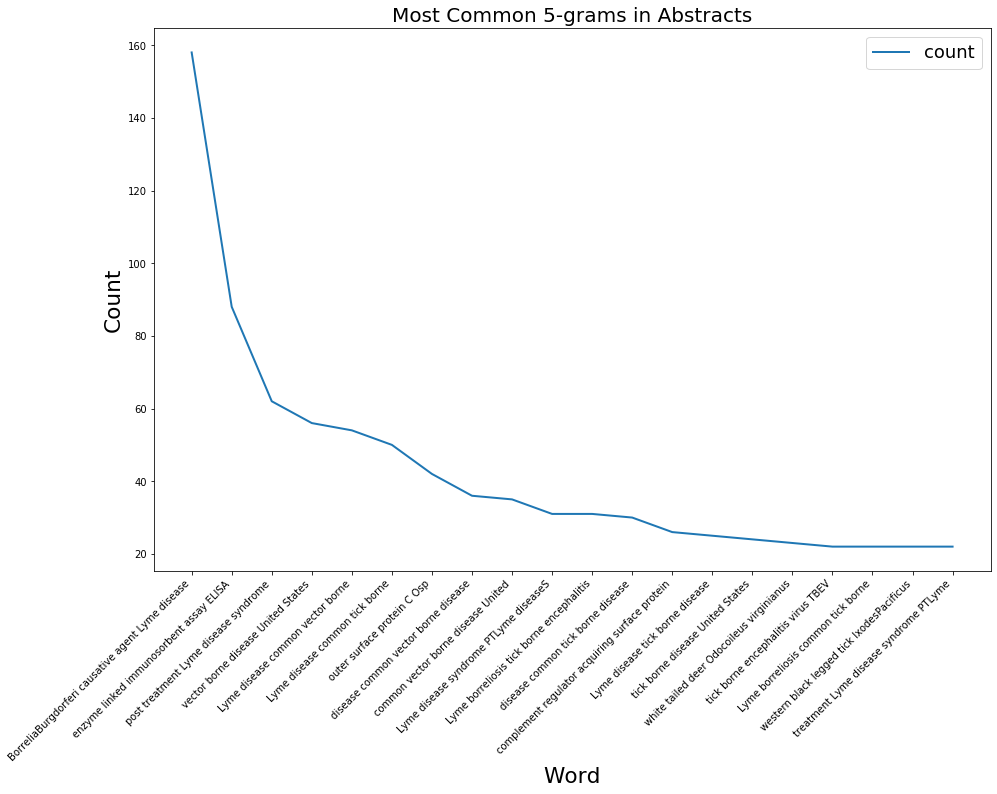

In [157]:
mostCommon5grams.plot(x='words', y='count')
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Most Common 5-grams in Abstracts')
plt.xticks(mostCommon5grams.index, list(mostCommon5grams.words), rotation=45, ha='right')
;

### Sentiment of Most Common Words

<p>When predicting sentiment for a text, Flair makes a prediction of either positive or negative and gives a confidence between 0 and 1. COnverting these confidence values to negative values if the prediction is negative can help compare the prediction on one scale from -1 to 1.</p>


In [158]:
flairSentimentDF = mostCommonWords.apply(lambda row: flair_prediction(row.words), axis='columns', result_type='expand')
flairSentimentDF.rename(columns={0:'Sentiment', 1:'Confidence'}, inplace=True)
mostCommonWords = pd.concat([mostCommonWords, flairSentimentDF], axis='columns') 
del flairSentimentDF

In [160]:
flairSentimentDF = mostCommonTrigrams.apply(lambda row: flair_prediction(row.words), axis='columns', result_type='expand')
flairSentimentDF.rename(columns={0:'Sentiment', 1:'Confidence'}, inplace=True)
mostCommonTrigrams = pd.concat([mostCommonTrigrams, flairSentimentDF], axis='columns') 
del flairSentimentDF

''

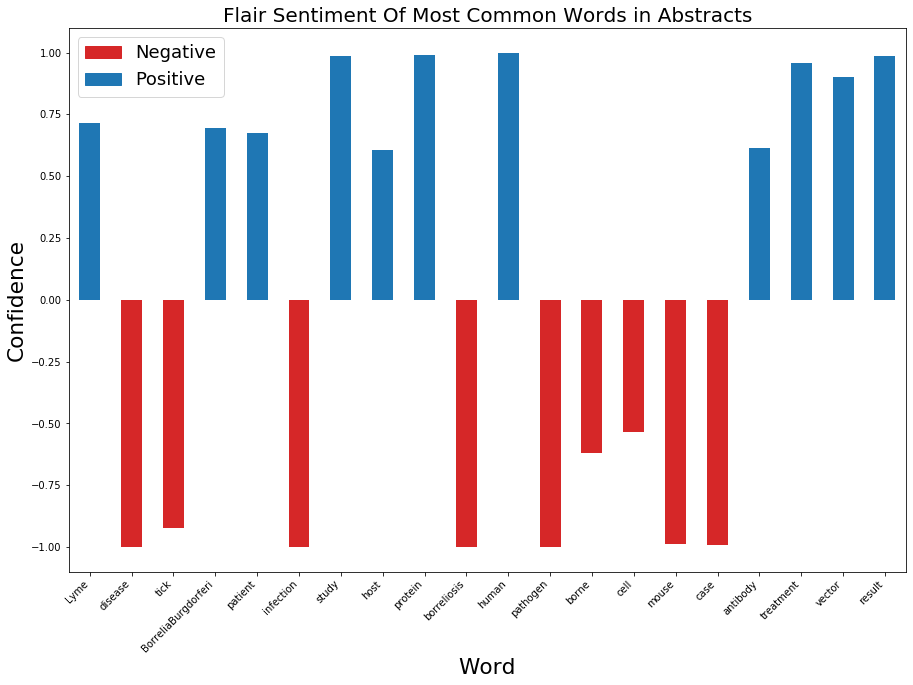

In [159]:
# mcw = mostCommonWords.sort_values('Confidence')
mcw = mostCommonWords.copy()

mcw['absConf'] = np.abs(mcw.Confidence)
colours = np.select([mcw.Confidence <0, mcw.Confidence >=0],['tab:red', 'tab:blue'])
# alphas = list(np.abs(mcw.Confidence.values))
mcw.plot(kind='bar',x='words', y='Confidence', color=colours)
# , alpha=[0.5,1])
plt.xlabel('Word')
plt.ylabel('Confidence')
plt.title('Flair Sentiment Of Most Common Words in Abstracts')
plt.xticks(mcw.index, list(mcw.words), rotation=45, ha='right')

red_patch = mpatches.Patch(color='tab:red', label='Negative')
blue_patch = mpatches.Patch(color='tab:blue', label='Positive')
plt.legend(handles=[red_patch, blue_patch])
;

''

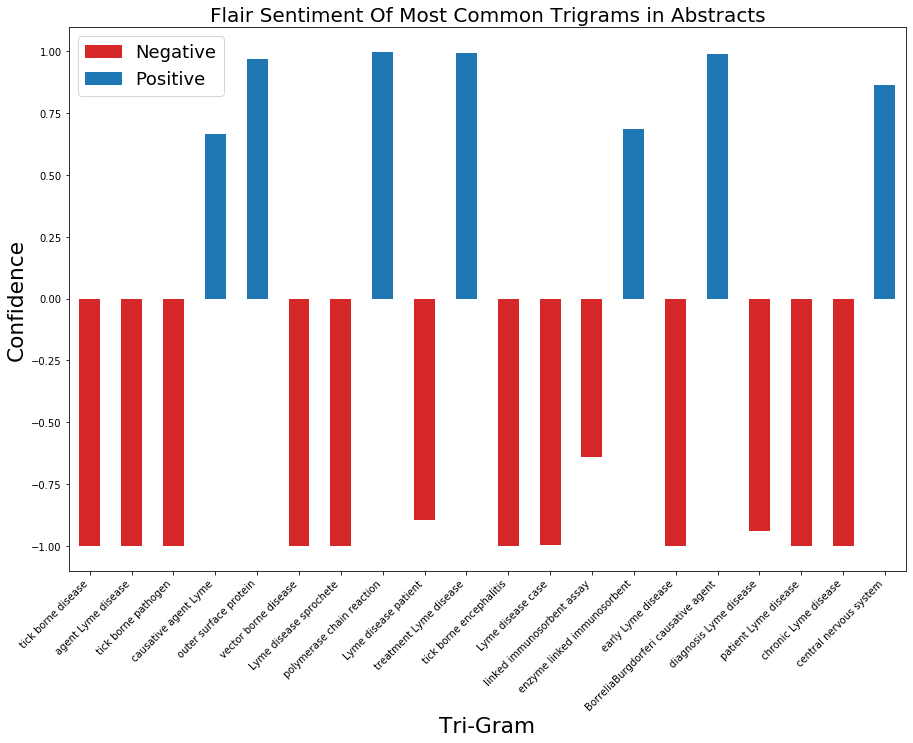

In [161]:
# mcw = mostCommonWords.sort_values('Confidence')
mcw = mostCommonTrigrams.copy()

mcw['absConf'] = np.abs(mcw.Confidence)
colours = np.select([mcw.Confidence <0, mcw.Confidence >=0],['tab:red', 'tab:blue'])
# alphas = list(np.abs(mcw.Confidence.values))
mcw.plot(kind='bar',x='words', y='Confidence', color=colours)
# , alpha=[0.5,1])
plt.xlabel('Tri-Gram')
plt.ylabel('Confidence')
plt.title('Flair Sentiment Of Most Common Trigrams in Abstracts')
plt.xticks(mcw.index, list(mcw.words), rotation=45, ha='right')

red_patch = mpatches.Patch(color='tab:red', label='Negative')
blue_patch = mpatches.Patch(color='tab:blue', label='Positive')
plt.legend(handles=[red_patch, blue_patch])
;

### Sentiment Over Time

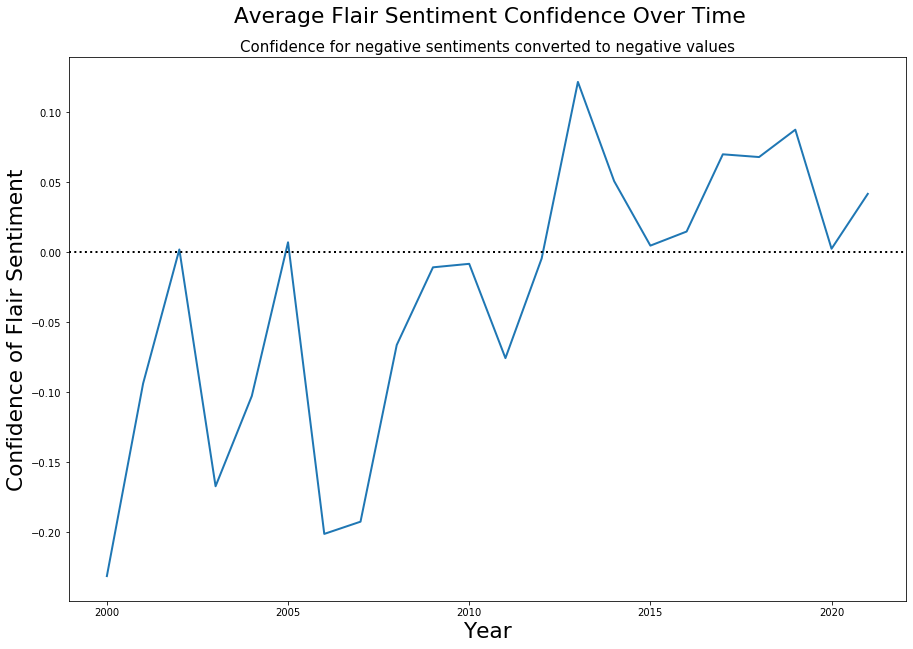

In [164]:
LymeDisease.groupby('year').abstractSentConfidence.mean().plot();
plt.xlabel('Year')
plt.ylabel('Confidence of Flair Sentiment')
plt.suptitle('Average Flair Sentiment Confidence Over Time', y=0.95, x =0.515)
plt.title('Confidence for negative sentiments converted to negative values', size='small')
plt.axhline(y=0, color='black', linestyle=':');

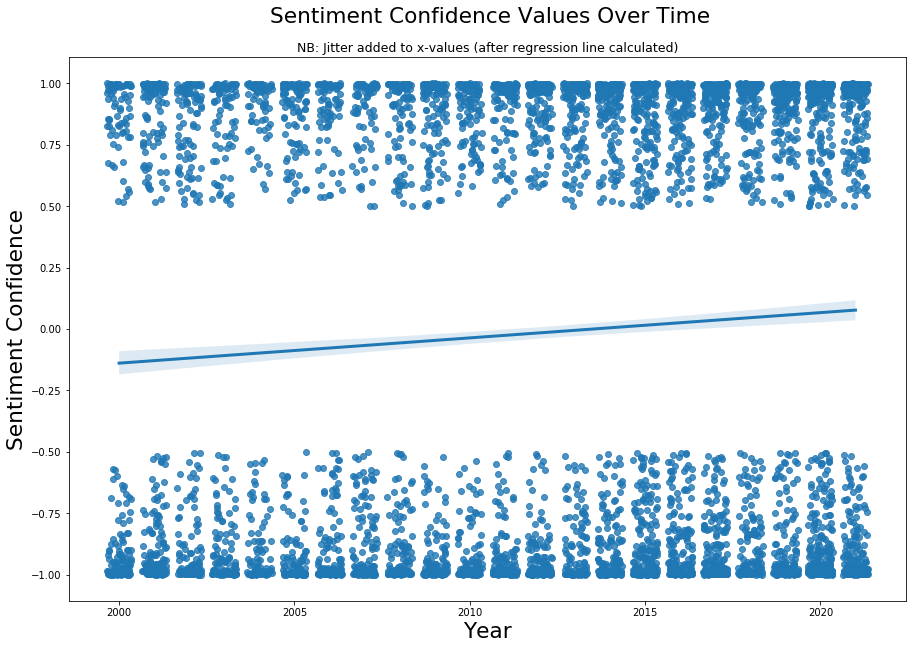

In [380]:
rcParams['figure.figsize'] = 15, 10
sns.regplot(x='year', y='abstractSentConfidence', data=LymeDisease, x_jitter=0.35)
plt.xlabel('Year')
plt.ylabel('Sentiment Confidence')
plt.suptitle('Sentiment Confidence Values Over Time', y=0.95, x =0.515)
plt.title('NB: Jitter added to x-values (after regression line calculated)', size='x-small');

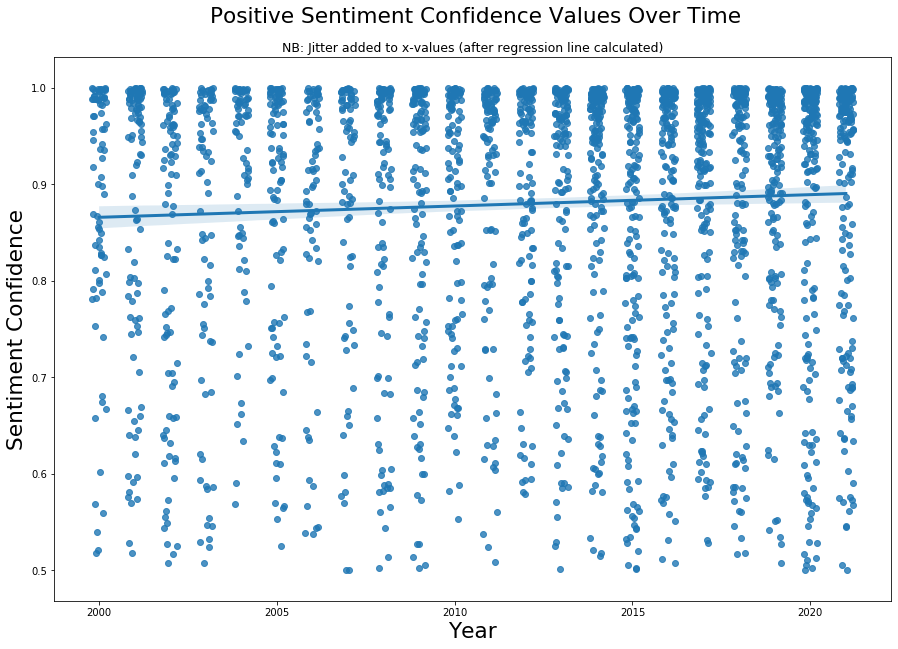

In [186]:
sns.regplot(x='year', y='abstractSentConfidence', data=LymeDisease[LymeDisease.abstractSentiment=='pos'], x_jitter=0.2)
plt.xlabel('Year')
plt.ylabel('Sentiment Confidence')
plt.suptitle('Positive Sentiment Confidence Values Over Time', y=0.95, x =0.515)
plt.title('NB: Jitter added to x-values (after regression line calculated)', size='x-small');

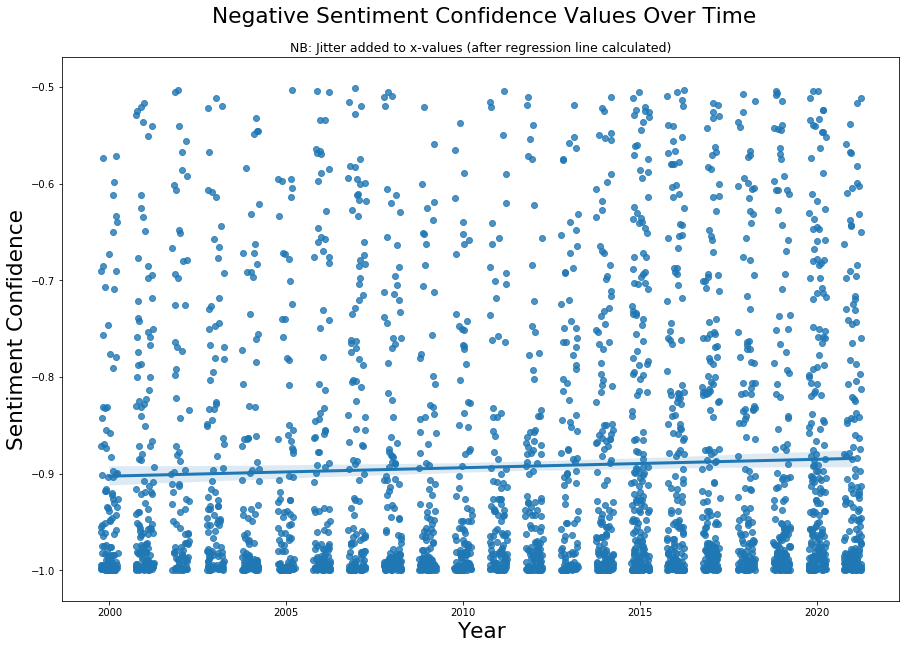

In [188]:
sns.regplot(x='year', y='abstractSentConfidence', data=LymeDisease[LymeDisease.abstractSentiment=='neg'], x_jitter=0.25)
plt.xlabel('Year')
plt.ylabel('Sentiment Confidence')
plt.suptitle('Negative Sentiment Confidence Values Over Time', y=0.95, x =0.515)
plt.title('NB: Jitter added to x-values (after regression line calculated)', size='x-small');

### Sentiment by Source

In [230]:
def normaliseJournals(text):
    text = re.sub('-', ' ', text)
    text = re.sub(r'\([^)]*\)', '', text)
    text = re.sub(r':.*$', '', text)
    text = re.sub(' +', ' ', text) #remove extra whitespace 
    text = text.strip() #remove trailing whitespace 
    return text

In [231]:
LymeDisease['publication']=LymeDisease.publication.apply(normaliseJournals)

In [234]:
mostCommonSources = pd.DataFrame(LymeDisease.publication.value_counts())
mostCommonSources.reset_index(inplace=True)
mostCommonSources.rename(columns={'index':'Publication', 'publication':'count'}, inplace=True)
mostCommonSources[:30]

,Publication,count
0,infection and immunity,304
1,ticks and tick borne diseases,232
2,plos one,186
3,vector borne and zoonotic diseases,174
4,journal of medical entomology,127
5,parasites & vectors,126
6,journal of clinical microbiology,119
7,emerging infectious diseases,81
8,journal of bacteriology,77
9,clinical and vaccine immunology,68


In [235]:
mcp = list(mostCommonSources.Publication)
mcs = pd.DataFrame(LymeDisease[LymeDisease['publication'].isin(mcp)].groupby('publication').abstractSentConfidence.mean())
mcs.reset_index(inplace=True)
mcs.rename(columns = {'publication':'Publication','abstractSentConfidence':'Confidence'}, inplace=True)
mcs['absConf'] = np.abs(mcs.Confidence)
mcs = pd.merge(mcs, mostCommonSources)
mcs.sort_values('count', inplace=True)

''

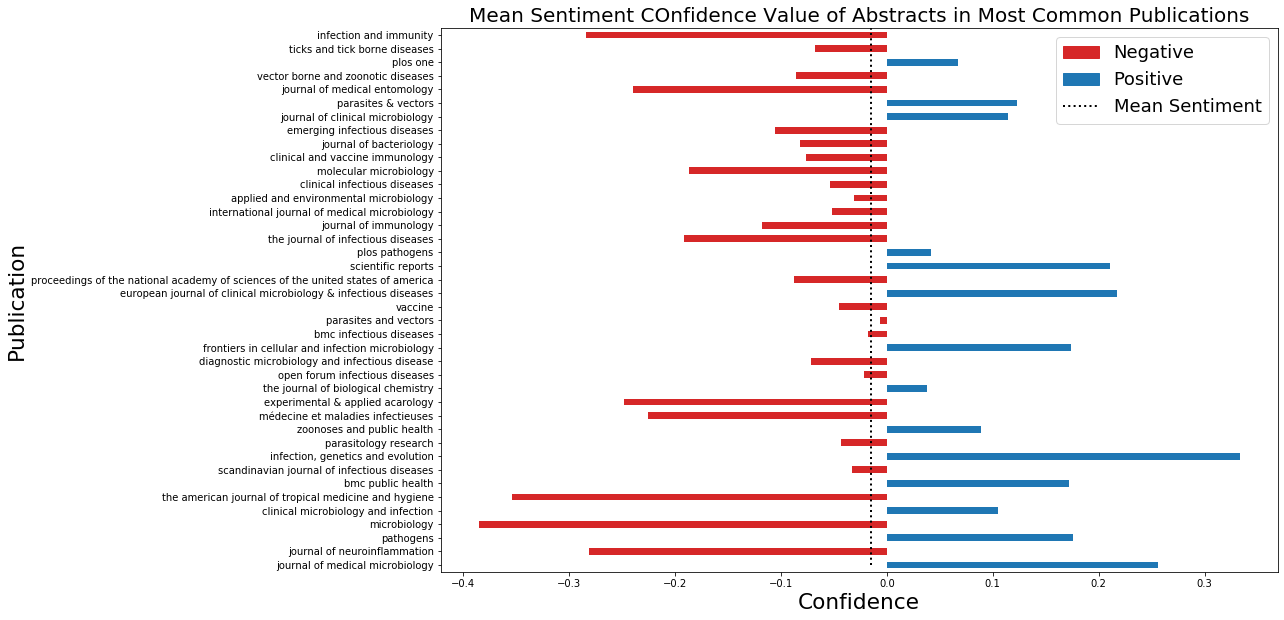

In [236]:
mcstop = mcs[-40:]
colours = np.select([mcstop.Confidence <0, mcstop.Confidence >=0],['tab:red', 'tab:blue'])
mcstop.plot(kind='barh',x='Publication', y='Confidence', color=colours)
plt.xlabel('Confidence')
plt.title('Mean Sentiment Confidence Value of Abstracts in Most Common Publications')
red_patch = mpatches.Patch(color='tab:red', label='Negative')
blue_patch = mpatches.Patch(color='tab:blue', label='Positive')
line = Line2D([0], [0], label='Mean Sentiment', color='k', linestyle=':')
plt.vlines(x=LymeDisease.abstractSentConfidence.mean(), ymin=0, ymax=50, color='black', linestyle=':')
plt.legend(handles=[red_patch, blue_patch, line])
;

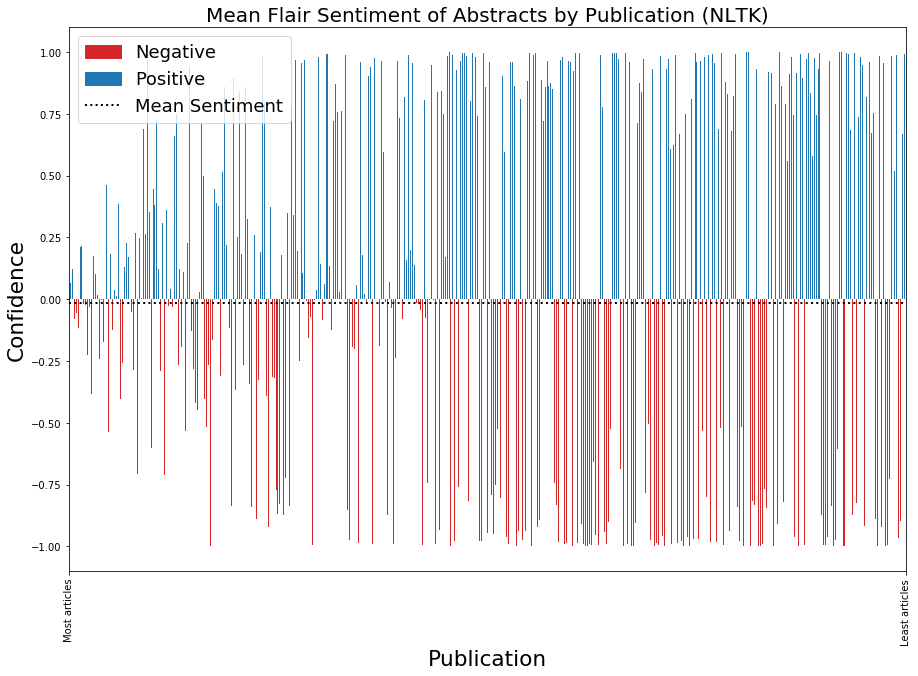

In [238]:
mcsSorted = mcs.sort_values('count', ascending=False)
colours = np.select([mcsSorted.Confidence <0, mcsSorted.Confidence >=0],['tab:red', 'tab:blue'])
mcsSorted.plot(kind='bar',x='Publication', y='Confidence', color=colours)
plt.xlabel('Publication')
plt.ylabel('Confidence')
plt.title('Mean Flair Sentiment of Abstracts by Publication (NLTK)')
red_patch = mpatches.Patch(color='tab:red', label='Negative')
blue_patch = mpatches.Patch(color='tab:blue', label='Positive')
line = Line2D([0], [0], label='Mean Sentiment', color='k', linestyle=':')
plt.legend(handles=[red_patch, blue_patch, line])
plt.xticks([0,len(mcsSorted)], ['Most articles', 'Least articles'])
plt.hlines(y=LymeDisease.abstractSentConfidence.mean(), xmin=0, xmax=len(mcsSorted), color='black', linestyle=':', label='corpus mean');
plt.legend;

## Topic Modelling

In [276]:
from gensim import corpora, models
from collections import defaultdict
from gensim.models import Phrases # Compute bigrams.
from gensim.corpora import Dictionary # For removing rare and common tokens.
from gensim.models import LdaModel # Train LDA model.
from gensim.models.coherencemodel import CoherenceModel #measuring coherence

from nltk.stem.wordnet import WordNetLemmatizer # Lemmatise the documents.
lemmatizer = WordNetLemmatizer()

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+') #tokenise based on tokens comprised of one or more alpanumeric chararacters

from wordcloud import WordCloud #displaying wordclouds of topics

import pickle # for saving models

### Functions

In [290]:
def prepareTextsForLDA(texts):
    """
    Prepare texts for gensim LDA analysis

    Parameters:
    ----------
    texts : List of input texts

    Returns:
    -------
    processedTexts : List of texts
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    
    """
    
    processedTexts = texts
    
    for idx in range(len(processedTexts)):
        processedTexts[idx] = processedTexts[idx].lower()  # Convert to lowercase.
        processedTexts[idx] = tokenizer.tokenize(processedTexts[idx])  # Split into words.

    # Remove numbers, but not words that contain numbers.
    processedTexts = [[token for token in text if not token.isnumeric()] for text in processedTexts]

    # Remove words that are only one character.
    processedTexts = [[token for token in text if len(token) > 1] for text in processedTexts]

    processedTexts = [[lemmatizer.lemmatize(token) for token in text] for text in processedTexts]

    # Add bigrams and trigrams to docs (only ones that appear 20 times or more).
    bigram = Phrases(processedTexts, min_count=20)
    trigram = Phrases(bigram[processedTexts], threshold=100)  
    print(trigram)
    for idx in range(len(processedTexts)):
        for token in bigram[processedTexts[idx]]:
            if '_' in token:
                # Token is a bigram, add to document.
                processedTexts[idx].append(token)

    # Create a dictionary representation of the documents.
    dictionary = Dictionary(processedTexts)

    # Filter out words that occur less than 20 documents, or more than 50% of the documents.
    dictionary.filter_extremes(no_below=20, no_above=0.5)

    # Bag-of-words representation of the documents.
    corpus = [dictionary.doc2bow(text) for text in processedTexts]

    return processedTexts, dictionary, corpus

In [ ]:
trigram = gensim.models.Phrases(bigram[proc], threshold=100)  

In [247]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        
        # Train LDA model.
        # Set training parameters.
        chunksize = 2000
        passes = 20
        iterations = 400
        eval_every = None  # Don't evaluate model perplexity, takes too much time.

        # Make a index to word dictionary.
        temp = dictionary[0]  # This is only to "load" the dictionary.
        id2word = dictionary.id2token

        model = LdaModel(
            corpus=corpus,
            id2word=id2word,
            chunksize=chunksize,
            alpha='auto',
            eta='auto',
            iterations=iterations,
            num_topics=num_topics,
            passes=passes,
            eval_every=eval_every
        )
        model_list.append(model)
#         top_topics = model.top_topics(corpus) 
#         avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, 
                                        coherence='c_v'
#                                        coherence='u_mass'
                                       )
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [312]:
abstracts = list(LymeDisease.processedAbstract.values)

In [313]:
texts, dictionary, corpus = prepareTextsForLDA(abstracts)

Phrases<417517 vocab, min_count=5, threshold=100, max_vocab_size=40000000>


In [249]:
modelList, coherenceValues = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=texts, start=2, limit=15, step=1)

In [278]:
with open('LDAmodelListFullCorpus.pkl', 'wb') as file:  
    pickle.dump(modelList, file)
    
with open('LDAcoherenceValuesFullCorpus.pkl', 'wb') as file:  
    pickle.dump(coherenceValues, file)    

In [250]:
pyLDAvis.enable_notebook()

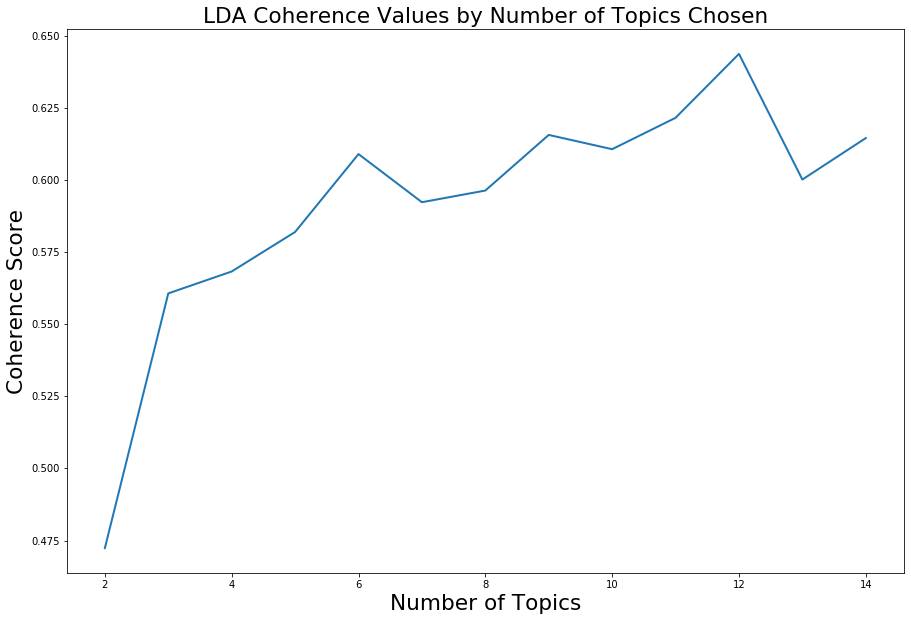

In [251]:
# Show graph
x = [mdl.num_topics for mdl in modelList]
plt.plot(x, coherenceValues)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("LDA Coherence Values by Number of Topics Chosen", size="large")
plt.show()

In [329]:
n = 6 ## ideal number of topics

In [267]:
LDAvisFull6 = gensimvis.prepare(modelList[n-2], corpus, dictionary)
pyLDAvis.save_html(LDAvisFull6, 'LDAvisFull6.html')
LDAvisFull6

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.102704  0.103126       1        1  22.019345
1      0.141340 -0.169163       2        1  20.955453
3     -0.195152  0.061558       3        1  19.186970
0      0.031856  0.202972       4        1  16.013120
2     -0.193750 -0.134622       5        1  11.098986
5      0.113002 -0.063872       6        1  10.726125, topic_info=                 Term         Freq        Total Category  logprob  loglift
61            patient  6074.000000  6074.000000  Default  30.0000  30.0000
528              cell  2523.000000  2523.000000  Default  29.0000  29.0000
568          antibody  2335.000000  2335.000000  Default  28.0000  28.0000
180             mouse  2481.000000  2481.000000  Default  27.0000  27.0000
740           protein  2921.000000  2921.000000  Default  26.0000  26.0000
..                ...          ...          ...      ...      ...      ...
15        borreliosis   457.688268  2910.075390   Topic6  -4.9979   0.3827
82                two   409.874883  1919.328469   Topic6  -5.1083   0.6886
158              used   387.781003  1409.088721   Topic6  -5.1637   0.9422
511               pcr   367.070582  1276.460894   Topic6  -5.2186   0.9862
51   lyme_borreliosis   370.893020  2487.524955   Topic6  -5.2082   0.3294

[473 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1323      4  0.995606         16
1324      4  0.989367    16_rrna
2325      4  0.987977         23
160       1  0.805600  abundance
160       3  0.010828  abundance
...     ...       ...        ...
200       2  0.468645       year
200       3  0.005285       year
200       4  0.014095       year
200       6  0.010571       year
2178      2  0.995656   year_old

[1009 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 4, 1, 3, 6])

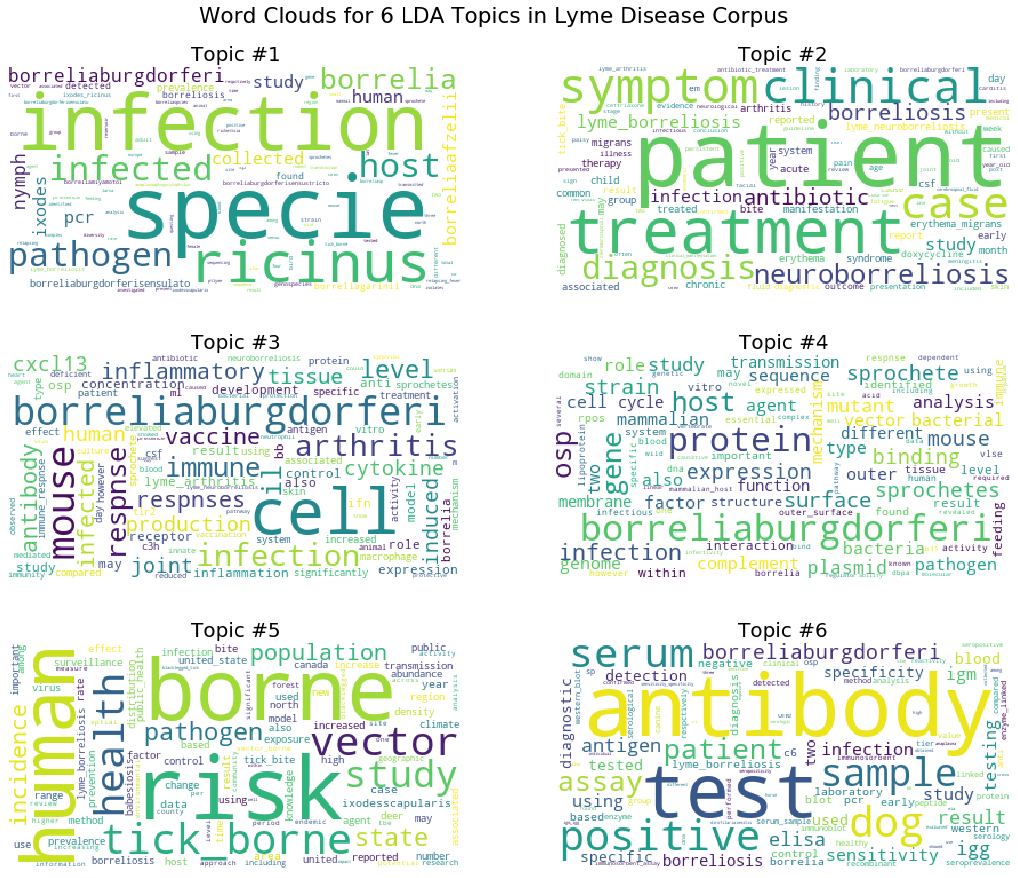

In [265]:
rcParams['figure.figsize'] = 18, 15
nrows = modelList[n-2].num_topics//2 + modelList[n-2].num_topics%2
fig=plt.figure()
for topicNum in range(modelList[n-2].num_topics):
    ax = fig.add_subplot(nrows,2,topicNum+1)
    wordcloud = WordCloud(background_color='white').fit_words(dict(modelList[n-2].show_topic(topicNum, 100)))
    ax.set_title("Topic #" + str(topicNum +1))
    ax.imshow(wordcloud)
    ax.axis('off')
plt.suptitle("Word Clouds for "+str(n)+" LDA Topics in Lyme Disease Corpus", y=0.93);

In [268]:
n=3

In [271]:
LDAvisFull3 = gensimvis.prepare(modelList[n-2], corpus, dictionary)
pyLDAvis.save_html(LDAvisFull3, 'LDAvisFull3.html')
LDAvisFull3

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.022393 -0.161474       1        1  35.376230
1     -0.161756  0.096417       2        1  33.612915
2      0.184149  0.065057       3        1  31.010855, topic_info=                    Term         Freq        Total Category  logprob  loglift
61               patient  6060.000000  6060.000000  Default  30.0000  30.0000
740              protein  2949.000000  2949.000000  Default  29.0000  29.0000
909                  osp  2283.000000  2283.000000  Default  28.0000  28.0000
14   borreliaburgdorferi  6775.000000  6775.000000  Default  27.0000  27.0000
81             treatment  2327.000000  2327.000000  Default  26.0000  26.0000
..                   ...          ...          ...      ...      ...      ...
341             borrelia   694.875293  1895.153065   Topic3  -5.6420   0.1675
115                human   749.040468  2853.265308   Topic3  -5.5670  -0.1666
757            arthritis   659.838467  1524.276935   Topic3  -5.6938   0.3336
834             analysis   662.819188  1732.867150   Topic3  -5.6893   0.2098
69                result   657.417313  2572.159658   Topic3  -5.6975  -0.1933

[238 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
160       1  0.984011   abundance
160       3  0.014942   abundance
607       3  0.997385  activation
935       1  0.003778       acute
935       2  0.959732       acute
...     ...       ...         ...
200       2  0.568007        year
200       3  0.006389        year
2178      2  0.998902    year_old
2452      1  0.974741    zoonotic
2452      3  0.024522    zoonotic

[356 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

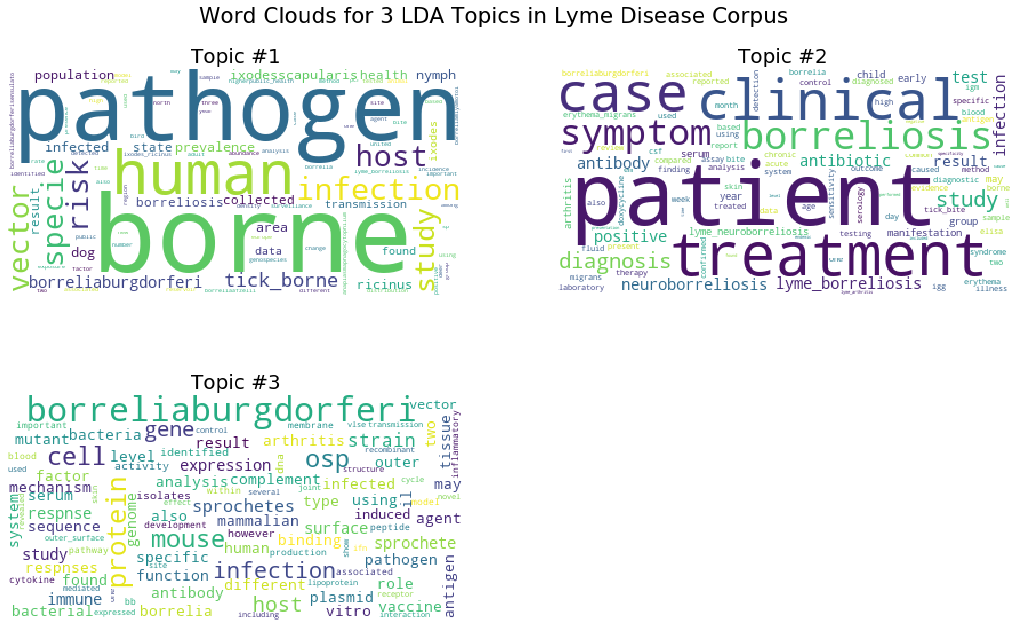

In [275]:
rcParams['figure.figsize'] = 18, 11
nrows = modelList[n-2].num_topics//2 + modelList[n-2].num_topics%2
fig=plt.figure()
for topicNum in range(modelList[n-2].num_topics):
    ax = fig.add_subplot(nrows,2,topicNum+1)
    wordcloud = WordCloud(background_color='white').fit_words(dict(modelList[n-2].show_topic(topicNum, 100)))
    ax.set_title("Topic #" + str(topicNum +1))
    ax.imshow(wordcloud)
    ax.axis('off')
plt.suptitle("Word Clouds for "+str(n)+" LDA Topics in Lyme Disease Corpus", y=0.93);

In [330]:
optimal_model = modelList[4] #six topics

In [331]:
optimal_model.num_topics

6

In [332]:
# https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#19findthemostrepresentativedocumentforeachtopic

def define_document_topics (ldamodel, corpus, texts):
    # Init output
    doc_topics_df = pd.DataFrame()
    
    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                doc_topics_df = doc_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
#     doc_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    doc_topics_df = pd.concat([doc_topics_df, contents], axis=1)
    doc_topics_df.columns = ['Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

    return(doc_topics_df)

In [333]:
document_topics = define_document_topics(ldamodel=optimal_model, corpus=corpus, texts=texts)

# Show
document_topics.head(10)

,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,1.0,0.8972,"patient, treatment, symptom, clinical, case, d...","[author, describes, history, three, patient, p..."
1,4.0,0.5670,"risk, borne, human, tick_borne, vector, health...","[drag, sampling, commonly, used, method, obtai..."
2,4.0,0.7002,"risk, borne, human, tick_borne, vector, health...","[ixodesscapularis, say, larva, nymph, sampled,..."
3,4.0,0.5814,"risk, borne, human, tick_borne, vector, health...","[as, lyme, borreliosis, vector, population, de..."
4,4.0,0.6505,"risk, borne, human, tick_borne, vector, health...","[report, attempt, offshore, island, community,..."
5,2.0,0.6274,"cell, borreliaburgdorferi, mouse, infection, a...","[antibiotic, susceptibility, seven, borreliabu..."
6,0.0,0.3704,"specie, infection, ricinus, pathogen, infected...","[determine, whether, rodent, intensely, expose..."
7,4.0,0.7881,"risk, borne, human, tick_borne, vector, health...","[human, risk, contracting, lyme, disease, tick..."
8,0.0,0.7954,"specie, infection, ricinus, pathogen, infected...","[determine, whether, deer, may, play, role, cy..."
9,1.0,0.7237,"patient, treatment, symptom, clinical, case, d...","[author, recently, reexamined, peripheral, ner..."


In [334]:
LymeDisease = pd.concat([LymeDisease, document_topics], axis=1)

In [344]:
representiveDocuments = LymeDisease.groupby('Dominant_Topic')['Topic_Perc_Contrib'].max()

In [360]:
from pprint import pprint

In [377]:
print('Most Representive Abstract for Each Topic')
print('----------------------------------------')
for topic in range (0,6):
    print ('\nTopic', str(topic+1))
    print('Keywords:', LymeDisease[(LymeDisease.Dominant_Topic == topic) & 
                        (LymeDisease.Topic_Perc_Contrib == representiveDocuments[topic])].iloc[0].Keywords)
    pprint('Title: ' + LymeDisease[(LymeDisease.Dominant_Topic == topic) & (LymeDisease.Topic_Perc_Contrib == representiveDocuments[topic])].iloc[0].title) 
    pprint('Abstract: ' + LymeDisease[(LymeDisease.Dominant_Topic == topic) & 
                        (LymeDisease.Topic_Perc_Contrib == representiveDocuments[topic])].iloc[0].abstract)

Most Representive Abstract for Each Topic
----------------------------------------

Topic 1
Keywords: specie, infection, ricinus, pathogen, infected, host, borrelia, borreliaburgdorferi, nymph, borreliaafzelii
('Title: Genetic heterogeneity of Borrelia burgdorferi sensu lato in the '
 'southern United States based on restriction fragment length polymorphism and '
 'sequence analysis.')
('Abstract: Fifty-six strains of Borrelia burgdorferi sensu lato, isolated '
 'from ticks and vertebrate animals in Missouri, South Carolina, Georgia, '
 'Florida, and Texas, were identified and characterized by PCR-restriction '
 'fragment length polymorphism (RFLP) analysis of rrf (5S)-rrl (23S) '
 'intergenic spacer amplicons. A total of 241 to 258 bp of intergenic spacers '
 'between tandemly duplicated rrf (5S) and rrl (23S) was amplified by PCR. '
 'MseI and DraI restriction fragment polymorphisms were used to analyze these '
 'strains. PCR-RFLP analysis results indicated that the strains represent

## Saving Dataframe

In [381]:
LymeDisease.to_csv('LymeDiseaseFullWithTopics.csv')

### Sentiment by Method and Mention of 'Chronic'
